In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
savefigs = False

## Circuit Duration Speedups (Fig. 6)

In [3]:
with open('data/data_main_duration_normalized.pickle', 'rb') as handle:
    duration_data_normalized = pickle.load(handle)

In [4]:
circuit_names = list(duration_data_normalized.keys())
bar_heights1 = []
bar_heights2 = []
for circuit in circuit_names:
    bar_heights1.append(1/duration_data_normalized[circuit]['base-transv']['total'])
    bar_heights2.append(1/duration_data_normalized[circuit]['dp-transv']['total'])

geomean1 = np.array(bar_heights1).prod()**(1/(len(bar_heights1)))
geomean2 = np.array(bar_heights2).prod()**(1/(len(bar_heights2)))
bar_heights1.append(geomean1)
bar_heights2.append(geomean2)
circuit_names.append('geomean')

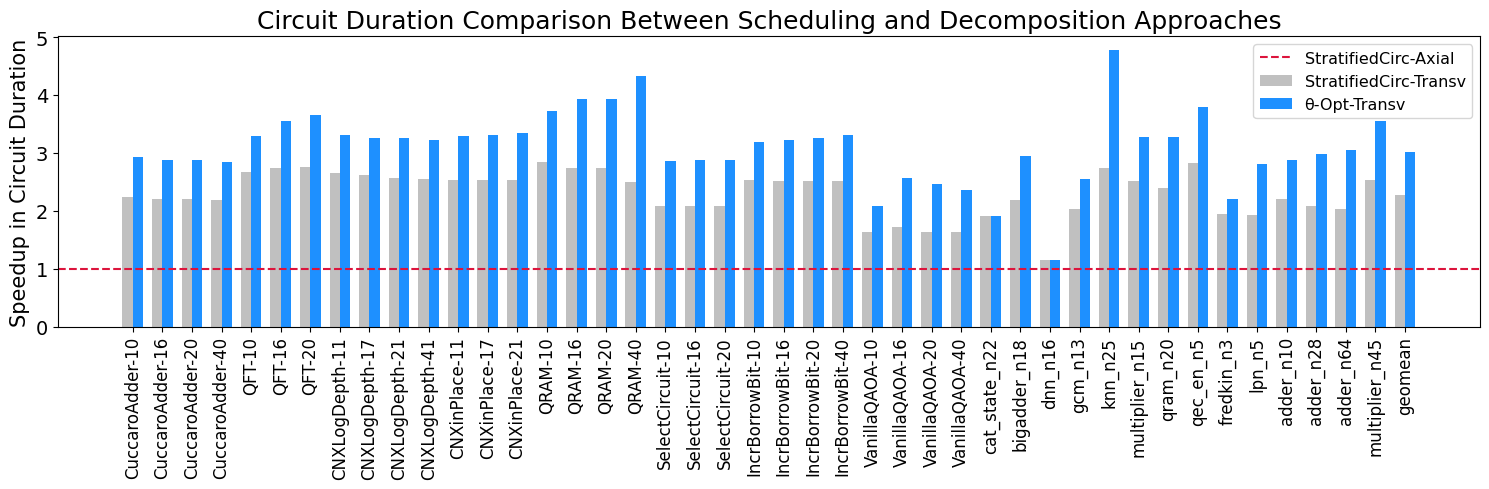

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

bar_width = 0.35
x = np.arange(len(circuit_names))
ax.bar(x - bar_width/2, bar_heights1, bar_width, label='StratifiedCirc-Transv', color='silver')
ax.bar(x + bar_width/2, bar_heights2, bar_width, label='θ-Opt-Transv', color='dodgerblue')
ax.set_xticks(x)
ax.set_xticklabels(circuit_names, rotation=90, fontsize=12)

ax.axhline(1, linestyle='--', color='crimson', label='StratifiedCirc-Axial')

ax.set_ylabel('Speedup in Circuit Duration', fontsize=15)
ax.set_title('Circuit Duration Comparison Between Scheduling and Decomposition Approaches', fontsize=18)

ax.legend(fontsize=11.5)
plt.yticks(fontsize=14)
plt.tight_layout()
if savefigs:
    plt.savefig('data/results_main_duration_speedup',bbox_inches='tight',dpi=300)
plt.show()

## Fidelity Improvement (Fig. 7)

In [6]:
with open('data/data_main_fidelity_improvement.pickle', 'rb') as handle:
    fid_improvement_data = pickle.load(handle)

In [7]:
circuit_names = fid_improvement_data.keys()
fid_improvements = [fid_improvement_data[circuit_name] for circuit_name in circuit_names]

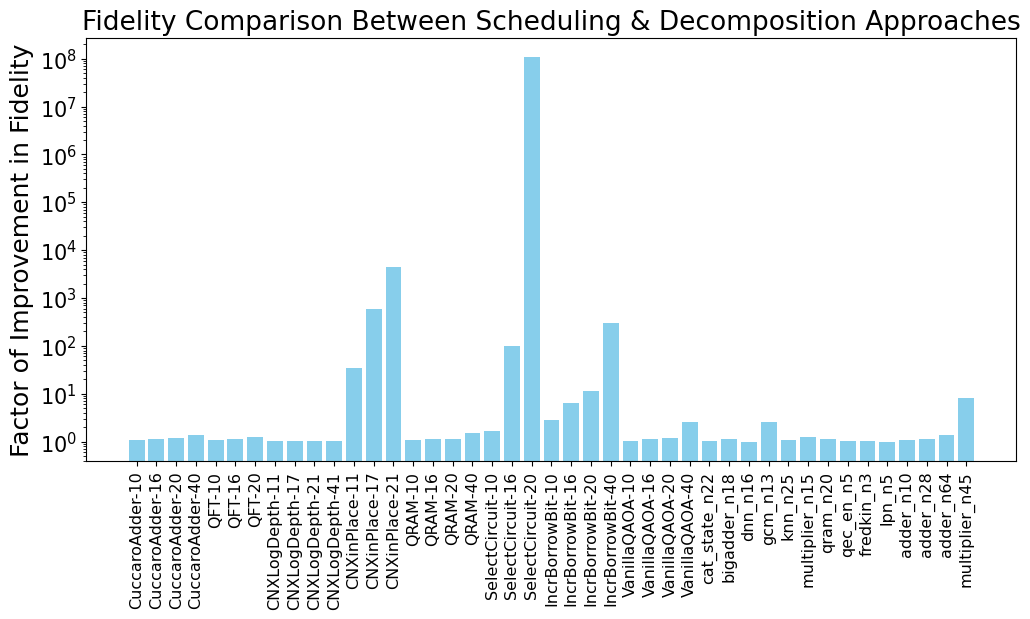

In [8]:
plt.figure(figsize=(12,5.5))
plt.bar(circuit_names, fid_improvements, color='skyblue')
plt.xticks(fontsize=11.5,rotation=90)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('Factor of Improvement in Fidelity', fontsize=18)
plt.title('Fidelity Comparison Between Scheduling & Decomposition Approaches', fontsize=19)
if savefigs:
    plt.savefig('data/results_main_fidelity_improvement',bbox_inches='tight',dpi=300)
plt.show()

## Varying Connectivity (Fig. 8)

In [9]:
def plot_data_bars(bars_data,figsize,bar_width,hatch_patterns,ha,rotation,colors,legend1_labels,legend1_fontsize,
                   x_bar_pos,xtick_pos,xtick_labels,x_ax_fontsize,ylabel,y_ax_fontsize,ytick_fontsize,
                   title,title_fontsize,savefig_title,savefig=False,dpi=300,add_hatch_legend=False,
                   legend2_labels=None,legend2_fontsize=None,legend2_loc=None,legend2_bar_color=None):
    
    ydata = {gate_type: [] for gate_type in legend1_labels.keys()}
    for i in range(len(bars_data)):
        for gate_type in ydata:
            ydata[gate_type].append(bars_data[i][gate_type])
    
    fig, ax = plt.subplots(figsize=figsize)
    bottom_data = np.array([0 for i in range(len(ydata['rz']))], dtype='float64')
    for idx, gate_type in enumerate(ydata):  # Iterate over the index and value of ydata
        ax.bar(x_bar_pos, ydata[gate_type], bar_width, bottom=bottom_data,
                label=legend1_labels[gate_type], color=colors[gate_type])
        bottom_data += np.array(ydata[gate_type])
    
    idx=0
    for bar in ax.patches:
        bar.set_hatch(hatch_patterns[idx%len(hatch_patterns)])
        idx+=1
    
    ax.set_ylabel(ylabel, fontsize=y_ax_fontsize)
    ax.set_title(title, fontsize=title_fontsize)
    plt.xticks(ticks=xtick_pos, labels=xtick_labels, fontsize=x_ax_fontsize, rotation=rotation, ha=ha)
    plt.yticks(fontsize=ytick_fontsize)

    legend1 = ax.legend(fontsize=legend1_fontsize, facecolor='white')
    plt.gca().add_artist(legend1)

    if add_hatch_legend:
        assert legend2_labels!=None
        assert legend2_fontsize!=None
        assert legend2_loc!=None
        if legend2_bar_color==None:
            legend2_bar_color = 'whitesmoke'
        n=[]
        for i in range(len(hatch_patterns)):
            n.append(ax.bar(0, 0, color=legend2_bar_color, hatch=hatch_patterns[i]+hatch_patterns[i]))
        legend2 = plt.legend(n, legend2_labels, loc=legend2_loc, fontsize=legend2_fontsize, facecolor='white')
        plt.gca().add_artist(legend2)
    
    if savefig:
        plt.savefig(savefig_title, bbox_inches='tight', dpi=dpi)
    plt.show()

In [10]:
def plot_varying_connectivity(data,figsize=(11,5),bar_width=1.6,hatch_patterns=['','X'],ha='right',rotation=35,
                              spacing_between_bars=0.1,spacing_between_connectivities=0.5,spacing_between_circuits=1.5,
                              legend_fontsize=16,title_fontsize=18,x_ax_fontsize=12,y_ax_fontsize=17,ytick_fontsize=14,
                              savefig=False,savefig_title='data/results_connectivity',dpi=300):
    bars_data = []
    x_bar_pos = []
    xtick_pos = []
    xtick_labels = []
    curr_x_pos = 0

    for circuit_name in data:
        for connectivity in data[circuit_name]:
            xtick_pos.append(curr_x_pos)
            xtick_labels.append('[' + circuit_name + '; ' + str(connectivity) + ']')

            x_bar_pos.append(curr_x_pos - bar_width/2 - spacing_between_bars/2)
            bars_data.append(data[circuit_name][connectivity]['base-axial'])

            x_bar_pos.append(curr_x_pos + bar_width/2 + spacing_between_bars/2)
            bars_data.append(data[circuit_name][connectivity]['dp-transv'])

            curr_x_pos += 2*bar_width + spacing_between_bars + spacing_between_connectivities
        curr_x_pos += spacing_between_circuits

    ylabel = 'Circuit Duration (microseconds)'
    title =  'Scheduling & Decomposition Strategies for Different Connectivity'
    colors = {'gr': 'dodgerblue', 'rz': 'crimson', 'cz': 'silver'}
    legend_labels = {'gr': 'Global Rx/Ry Rotations','rz': 'Local Rz Rotations','cz': 'Two-Qubit (CZ) Gates'}
    
    plot_data_bars(bars_data,figsize,bar_width,hatch_patterns,ha,rotation,colors,legend_labels,legend_fontsize,
                   x_bar_pos,xtick_pos,xtick_labels,x_ax_fontsize,ylabel,y_ax_fontsize,ytick_fontsize,
                   title,title_fontsize,savefig_title,savefig=savefig,dpi=dpi)

In [11]:
# load data; dict is organized as data[circuit_name][connectivity][sched_decomp_type]
# connectivity here is specified as ratio of blockade radius to atom spacing

with open('data/data_connectivity.pickle', 'rb') as handle:
    connectivity_data = pickle.load(handle)

# For the sake of having a plot that is easy to read, we only include some circuits.
# Other circuits show similar trends to the ones displayed in this plot. 

circuits_to_plot = ['knn_n25','CuccaroAdder-20','QFT-20','QRAM-20']
connectivities_to_plot = [1,2,5]
data_to_plot = {}
for circuit_name in circuits_to_plot:
    data_to_plot[circuit_name] = {connectivity: connectivity_data[circuit_name][connectivity]
                                 for connectivity in connectivities_to_plot}

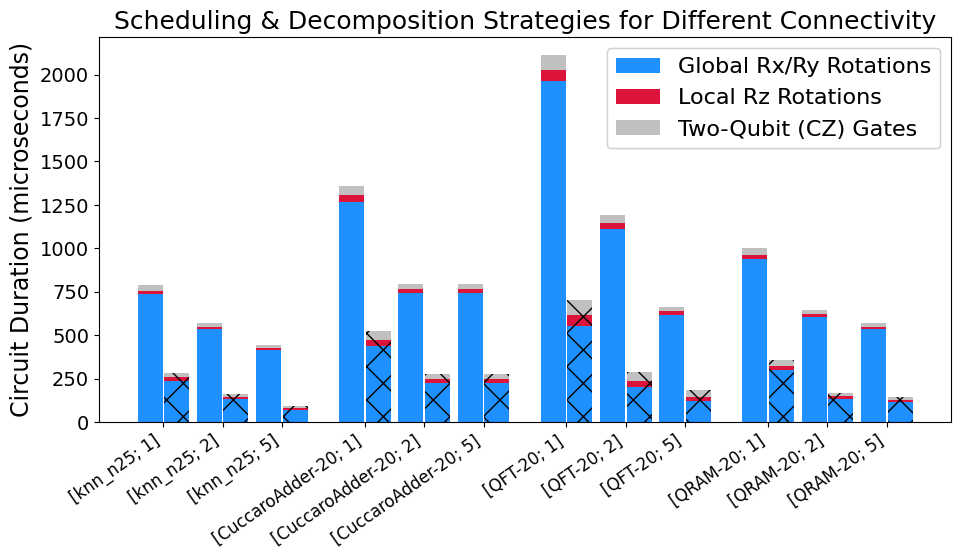

In [12]:
plot_varying_connectivity(data_to_plot,savefig=savefigs)

## Incorporating Native Multi-Qubit Gates (Fig. 9)

### Circuit Durations (Fig. 9a)

In [13]:
def plot_native_multiqubit_gate_data(duration_data,figsize= (12,5),hatch_patterns=['','||','//','X'] ,ha='center',rotation=0,
                                     bar_width=1.8,spacing_between_bars=0.15,spacing_between_circuits=2,legend1_fontsize=13,
                                     legend2_fontsize=12,legend2_loc=[0.01,0.45],legend2_bar_color='whitesmoke',
                                     title_fontsize=22,x_ax_fontsize=14,y_ax_fontsize=18,ytick_fontsize=14,
                                     savefig=False,savefig_title='data/results_multiqubit_gates_duration',dpi=300):
    bars_data = []
    x_bar_pos = []
    xtick_pos = []
    xtick_labels = []
    curr_x_pos = 0
    
    for circuit_name in duration_data:
        xtick_pos.append(curr_x_pos)
        xtick_labels.append(circuit_name)
    
        x_bar_pos.append(curr_x_pos - 1.5*bar_width - 1.5*spacing_between_bars)
        x_bar_pos.append(curr_x_pos - 0.5*bar_width - 0.5*spacing_between_bars)
        x_bar_pos.append(curr_x_pos + 0.5*bar_width + 0.5*spacing_between_bars)
        x_bar_pos.append(curr_x_pos + 1.5*bar_width + 1.5*spacing_between_bars)
    
        bars_data.append(duration_data[circuit_name]['base-axial-1q/2q'])
        bars_data.append(duration_data[circuit_name]['dp-transv-1q/2q'])
        bars_data.append(duration_data[circuit_name]['base-axial-3q'])
        bars_data.append(duration_data[circuit_name]['dp-transv-3q'])
            
        curr_x_pos += 4*bar_width + 3*spacing_between_bars + spacing_between_circuits
    
    ylabel = 'Circuit Duration (microseconds)'
    title =  'Impact of Native Multi-Qubit Gates on Circuit Duration'
    colors = {'gr': 'dodgerblue', 'rz': 'crimson', 'multi': 'silver'}
    legend1_labels = {'gr': 'Global Rx/Ry Rotations','rz': 'Local Rz Rotations','multi': 'Multi-Qubit (CZ/CCZ) Gates'}
    legend2_labels = ['StratifiedCirc-Axial, 1Q/2Q Gates Only',
                      'θ-Opt-Transv, 1Q/2Q Gates Only',
                      'StratifiedCirc-Axial, with 3Q Gates',
                      'θ-Opt-Transv, with 3Q Gates',
                     ]

    plot_data_bars(bars_data,figsize,bar_width,hatch_patterns,ha,rotation,colors,legend1_labels,legend1_fontsize,
                   x_bar_pos,xtick_pos,xtick_labels,x_ax_fontsize,ylabel,y_ax_fontsize,ytick_fontsize,
                   title,title_fontsize,savefig_title,savefig=savefig,dpi=300,add_hatch_legend=True,legend2_labels=legend2_labels,
                   legend2_fontsize=legend2_fontsize,legend2_loc=legend2_loc,legend2_bar_color=legend2_bar_color)

In [14]:
with open('data/data_multiqubit_gates_duration.pickle', 'rb') as handle:
    duration_data = pickle.load(handle)

circuits_to_plot = ['CNXLogDepth-41','knn_n25','QRAM-20','CuccaroAdder-16','adder_n28','adder_n64']
duration_data_to_plot = {circuit_name: duration_data[circuit_name] for circuit_name in circuits_to_plot}

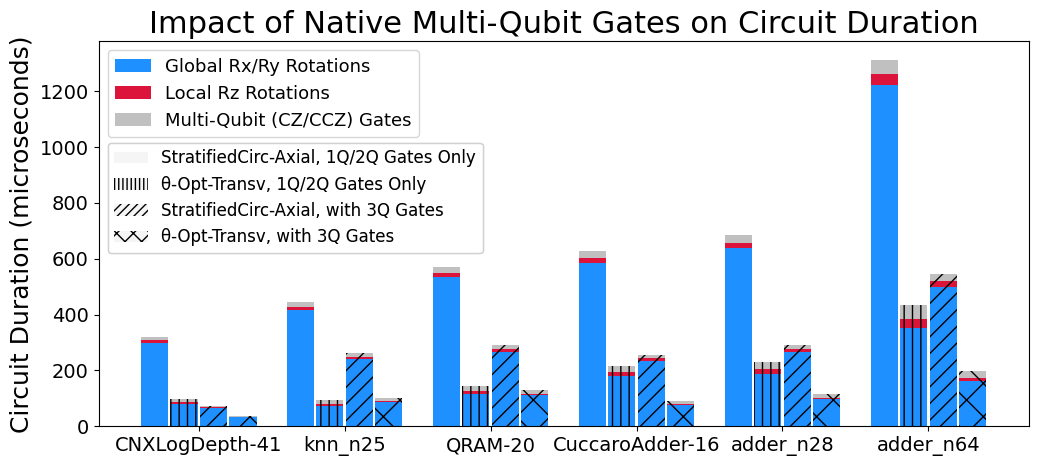

In [15]:
plot_native_multiqubit_gate_data(duration_data_to_plot,savefig=savefigs)

### Circuit Fidelities (Fig. 9b)

In [16]:
with open('data/data_multiqubit_gates_fidelity.pickle', 'rb') as handle:
    fidelity_data = pickle.load(handle)

circuits_to_plot = ['CuccaroAdder-10','CuccaroAdder-16','CuccaroAdder-20','CuccaroAdder-40',
                    'CNXLogDepth-11','CNXLogDepth-17','CNXLogDepth-21','CNXLogDepth-41','CNXinPlace-11',
                    'QRAM-10','QRAM-16','QRAM-20',
                    'SelectCircuit-10','SelectCircuit-16','IncrBorrowedBit-10','IncrBorrowedBit-16',
                    'knn_n25','qram_n20','adder_n28','adder_n64']
fidelity_data_to_plot = {circuit_name: fidelity_data[circuit_name] for circuit_name in circuits_to_plot}

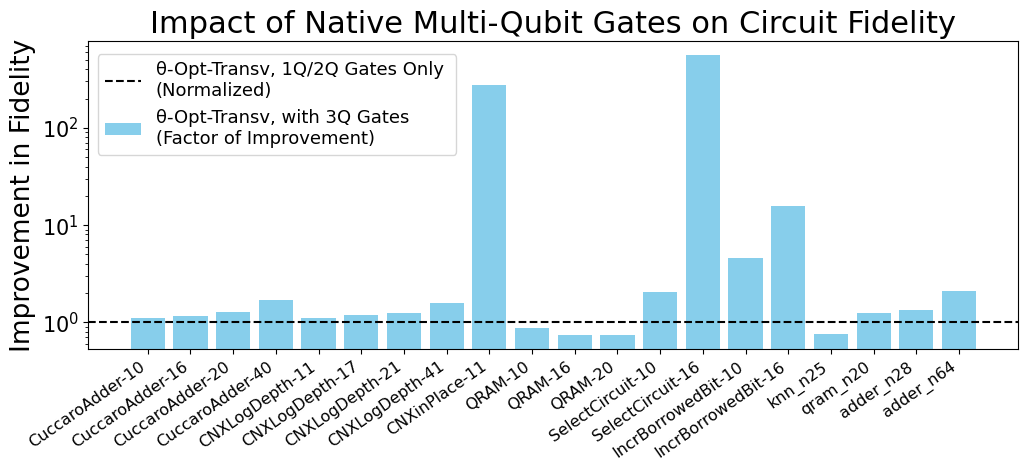

In [17]:
circuit_names = []
fid_improvements = []
for circuit_name in circuits_to_plot:
    circuit_names.append(circuit_name)
    fid_with_3q = fidelity_data[circuit_name]['dp-transv-3q']['total']
    fid_without_3q = fidelity_data[circuit_name]['dp-transv-1q/2q']['total']
    fid_improvements.append(fid_with_3q/fid_without_3q)

plt.figure(figsize=(12,4))
plt.bar(circuit_names, fid_improvements, color='skyblue',label='θ-Opt-Transv, with 3Q Gates \n(Factor of Improvement)')
plt.xticks(fontsize=11.5,rotation=35, ha='right')
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('Improvement in Fidelity', fontsize=19)
plt.title('Impact of Native Multi-Qubit Gates on Circuit Fidelity', fontsize=22)
plt.axhline(1, linestyle='--', color='black', label='θ-Opt-Transv, 1Q/2Q Gates Only \n(Normalized)')
plt.legend(loc=[0.01,0.63],fontsize=13)
if savefigs:
    plt.savefig('data/results_multiqubit_gates_fidelity',bbox_inches='tight',pad_inches=1,dpi=300)
plt.show()